<a href="https://colab.research.google.com/github/ashifka/ashif/blob/main/Ashif(DSA_Aug_Batch_2023_Question).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [6]:
data = pd.read_csv('/content/Obesity.csv')


# Exploratory Data Analysis

## **1.Data Understanding**

In [7]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [9]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.shape

(2111, 17)

## **2.Data Cleaning**

In [12]:
data["Age"].value_counts()

18.000000    127
26.000000    101
21.000000     94
23.000000     88
19.000000     59
            ... 
18.549437      1
36.310292      1
33.270448      1
33.081600      1
23.664709      1
Name: Age, Length: 1406, dtype: int64

In [32]:
data["Age"] = data["Age"].round()
data["Age"] = data["Age"].astype('int64') #we round the values age as floating number and changed to int64

In [33]:
data["Age"].value_counts()

21    234
23    217
26    213
18    211
19    169
22    163
20    150
24     95
25     82
17     69
31     61
30     53
27     43
33     37
38     34
29     32
34     29
32     26
39     25
37     24
28     20
41     20
16     20
35     19
40     19
42      6
44      6
36      6
55      5
45      3
99      3
43      3
46      2
51      2
14      1
48      1
90      1
56      1
98      1
88      1
2       1
52      1
15      1
47      1
Name: Age, dtype: int64

In [26]:
data["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [35]:
data["CALC"].replace("Always", "Frequently", inplace=True) #since there is only one 'Always' and the term more related to 'Frequently'

In [36]:
data["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      71
Name: CALC, dtype: int64

In [27]:
data["MTRANS"].value_counts()

Public_Transportation    1576
Automobile                455
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [37]:
data["MTRANS"].replace("Motorbike", "Automobile", inplace=True)
data["MTRANS"].replace("Bike", "Automobile", inplace=True)   #since 'Motorbike' and 'Bike' came under the category 'Automobile'

In [38]:
data["MTRANS"].value_counts()

Public_Transportation    1576
Automobile                473
Walking                    55
Name: MTRANS, dtype: int64

In [39]:
data.isnull().sum()# checking there if any null set

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [43]:
# Handling missing values with mean for numerical values and mode for categorical value
mode_Gender = data['Gender'].mode()[0]
data['Gender'].fillna(mode_Gender,inplace= True)

mean_Height= data['Height'].mean()
data['Height'].fillna(mean_Height,inplace= True)

mode_family_history_with_overweight = data['family_history_with_overweight'].mode()[0]
data['family_history_with_overweight'].fillna(mode_family_history_with_overweight, inplace=True)

mode_CAEC = data['CAEC'].mode()[0]
data['CAEC'].fillna(mode_CAEC, inplace=True)

mode_SCC = data['SCC'].mode()[0]
data['SCC'].fillna(mode_SCC, inplace=True)

mode_MTRANS = data['MTRANS'].mode()[0]
data['MTRANS'].fillna(mode_MTRANS, inplace=True)

In [44]:
data.isnull().sum()# checking there if any null set

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## **4.Data Visualisation**

<ipython-input-49-c24ff04492b2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right',fontsize=6)


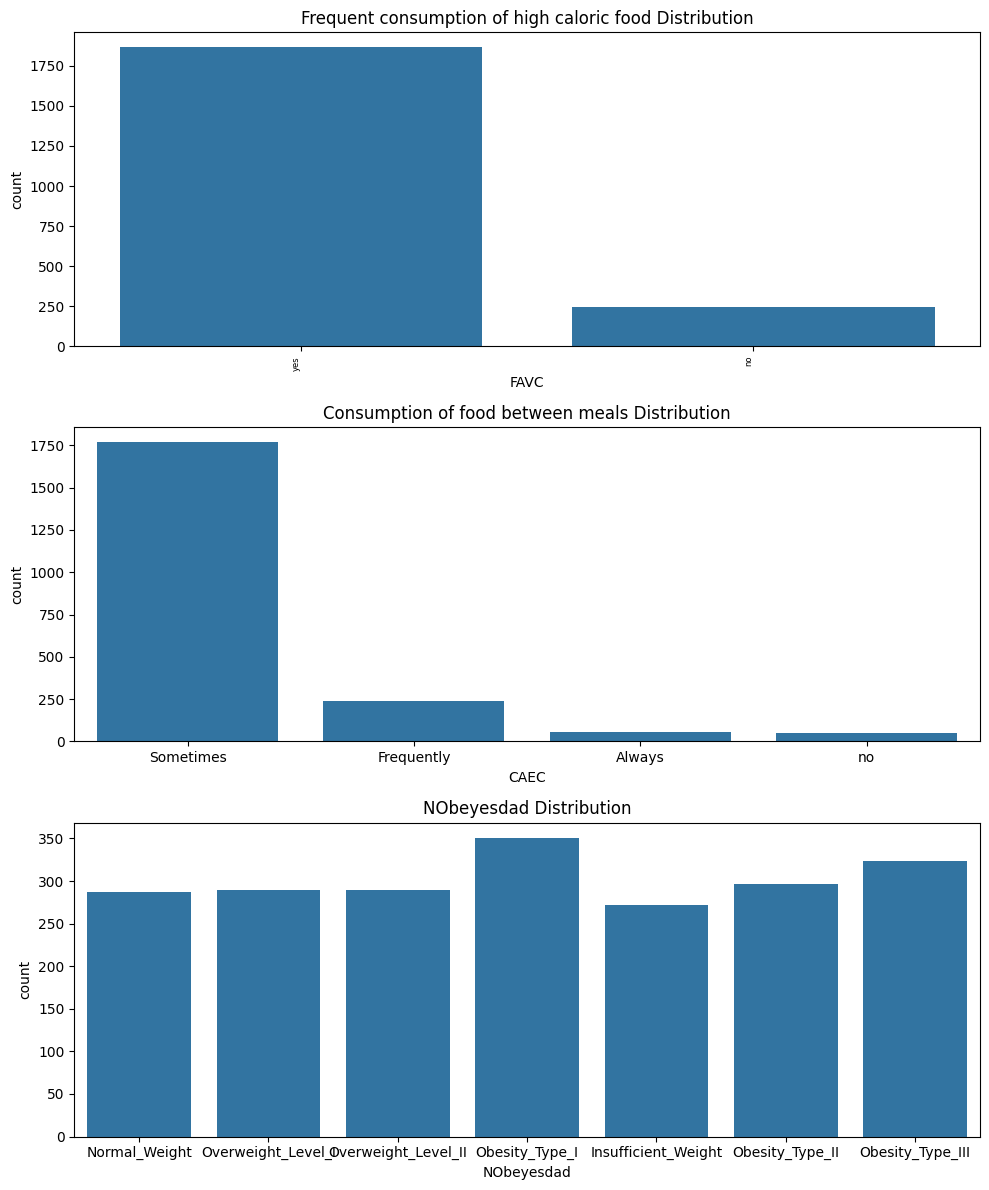

In [49]:
# Bar plots for Frequent consumption of high caloric food, Consumption of food between meals, and NObeyesdad to see the distribution.

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Bar plot for Frequent consumption of high caloric food
sns.countplot(x='FAVC', data=data, ax=axes[0],order=data['FAVC'].value_counts().index)
axes[0].set_title('Frequent consumption of high caloric food Distribution')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right',fontsize=6)

# Bar plot for Consumption of food between meals
sns.countplot(x='CAEC', data=data, ax=axes[1])
axes[1].set_title('Consumption of food between meals Distribution')

# Bar plot for NObeyesdad
sns.countplot(x='NObeyesdad', data=data, ax=axes[2])
axes[2].set_title('NObeyesdad Distribution')

# Adjust layout and show the plots

plt.tight_layout()
plt.show()

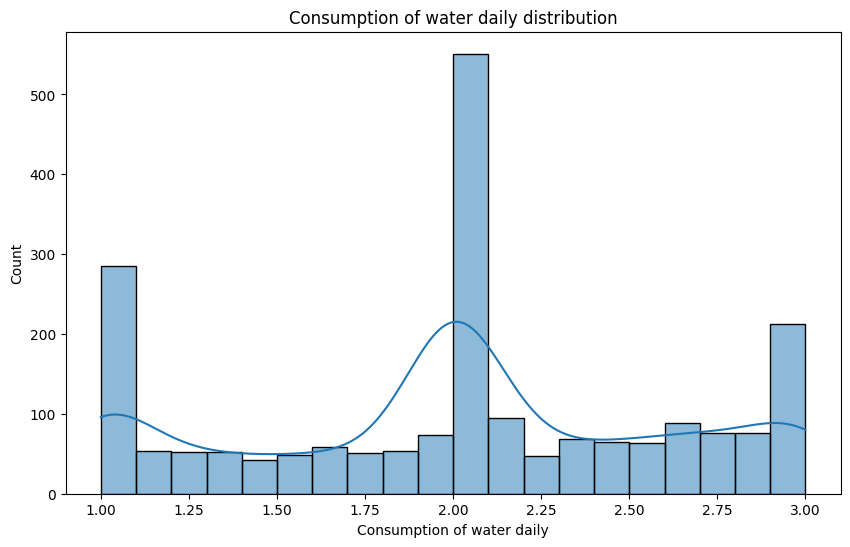

In [50]:
#Consumption of water daily distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['CH2O'], bins=20, kde=True)
plt.title('Consumption of water daily distribution')
plt.xlabel('Consumption of water daily')
plt.show()

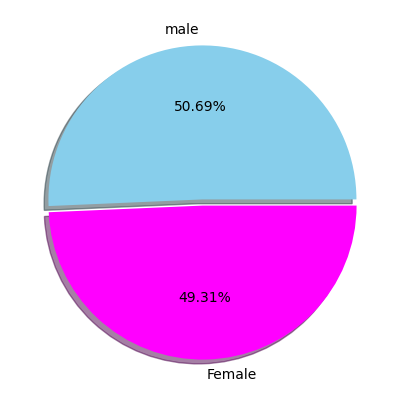

In [54]:
size = data['Gender'].value_counts()
labels = ['male', 'Female']
color = ['skyblue', 'magenta']
explode = [0.02, 0.02]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.show()

<Axes: xlabel='FAVC', ylabel='FAF'>

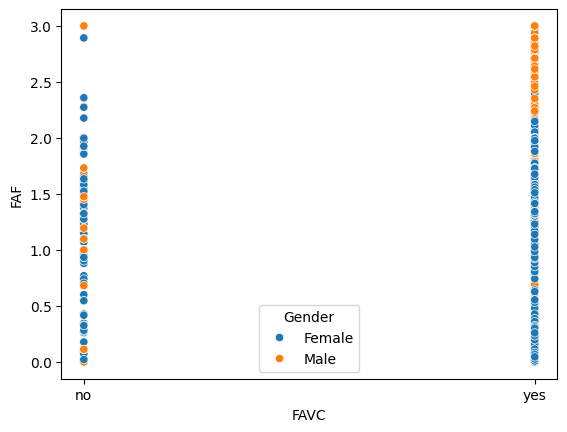

In [57]:
sns.scatterplot(x = 'FAVC', y = 'FAF',hue ='Gender',data = data)

# **Data Preprocessing**

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])

data['FAVC'] = label_encoder.fit_transform(data['FAVC'])

data['CAEC'] = label_encoder.fit_transform(data['CAEC'])

data['SCC'] = label_encoder.fit_transform(data['SCC'])

data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])

data['CALC'] = label_encoder.fit_transform(data['CALC'])

data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])

data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])


In [63]:
scaler = StandardScaler()
numerical_cols = ['Weight', 'Age']
for col in numerical_cols:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))


In [64]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.473574,1.62,-0.862558,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,2,1,1
1,0,-0.473574,1.52,-1.168077,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,1,1,1
2,1,-0.202318,1.80,-0.366090,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,0,1,1
3,1,0.340195,1.80,0.015808,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,0,2,5
4,1,-0.337946,1.78,0.122740,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,1,1,6
5,1,0.611451,1.62,-1.282647,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,1,0,1
6,0,-0.202318,1.50,-1.206267,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,1,0,1
7,1,-0.337946,1.64,-1.282647,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,1,1,1
8,1,-0.066690,1.78,-0.862558,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,0,1,1
9,1,-0.337946,1.72,-0.709799,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,2,1,1


# **Modelling**

<Axes: >

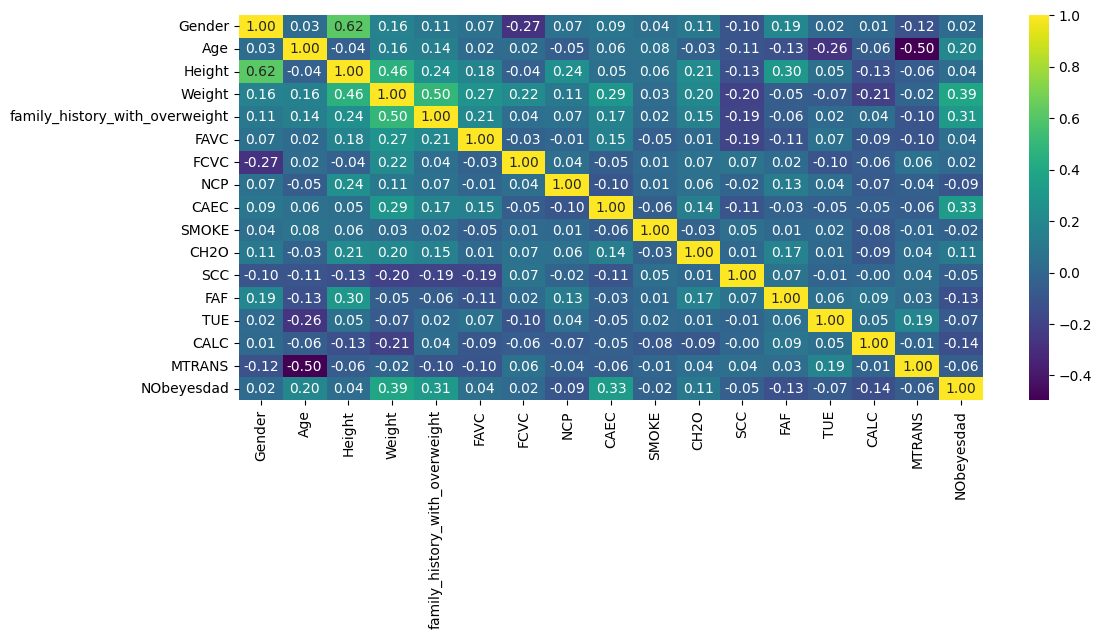

In [65]:
plt.figure(figsize = (12,5))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [66]:
X = data.drop(['NObeyesdad'],axis = 1) #Creating Feature and Target variables
y = data['NObeyesdad']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
models = {
  'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [70]:
max_length = max(len(name) for name in models.keys())
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'{name.ljust(max_length)} : Accuracy: {accuracy:.5f}')
    print(f'{"":<{max_length}} : Confusion Matrix:\n{confusion_mat}')
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression     : Accuracy: 0.79924
                       : Confusion Matrix:
[[65  2  0  0  0  1  0]
 [24 36  0  0  0 13  5]
 [ 0  0 78  8  0  2  6]
 [ 0  0  0 75  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  5  0  0  0 46 20]
 [ 0  0  8  1  0 10 44]]


SVC                    : Accuracy: 0.83902
                       : Confusion Matrix:
[[64  4  0  0  0  0  0]
 [17 46  0  0  0 10  5]
 [ 0  0 84  6  0  2  2]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  8  0  0  0 52 11]
 [ 0  1  6  1  0 10 45]]


RandomForestClassifier : Accuracy: 0.94129
                       : Confusion Matrix:
[[63  5  0  0  0  0  0]
 [ 1 72  0  0  0  5  0]
 [ 0  1 90  3  0  0  0]
 [ 0  0  1 74  0  0  0]
 [ 0  0  1  0 78  0  0]
 [ 0  8  0  0  0 61  2]
 [ 0  1  0  0  0  3 59]]


DecisionTreeClassifier : Accuracy: 0.92235
                       : Confusion Matrix:
[[63  5  0  0  0  0  0]
 [10 64  0  0  0  4  0]
 [ 0  1 86  4  0  0  3]
 [ 0  0  3 72  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  5  0  0  0 64  2]

In [71]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'C': [0.1, 1, 10, 100],
             'penalty': ['l2'],
             'solver': ['lbfgs']
        }
    },
    'SVC' : {
        'model' : SVC(),
        'param' : {
            'C': [0.1, 1, 10, 100],
            'gamma': [0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf', 'linear']
        }
    },
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    'DecisionTreeClassifier' : {
        'model' : DecisionTreeClassifier(),
        'param' : {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

In [72]:
from sklearn.model_selection import  GridSearchCV

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

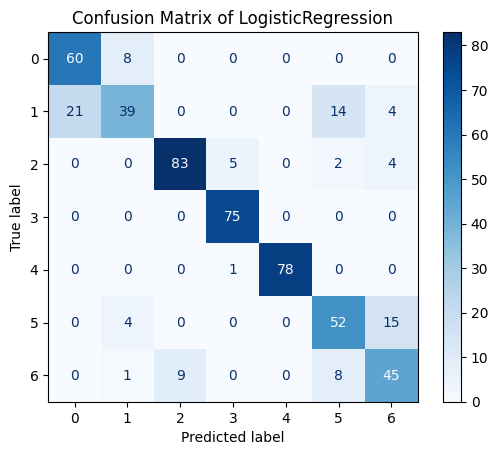

Fitting 5 folds for each of 32 candidates, totalling 160 fits


<Figure size 800x600 with 0 Axes>

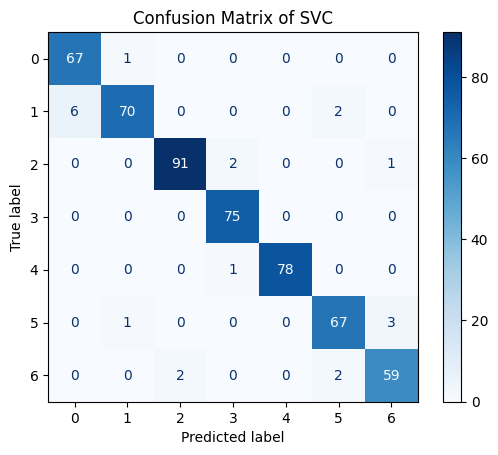

Fitting 5 folds for each of 162 candidates, totalling 810 fits


<Figure size 800x600 with 0 Axes>

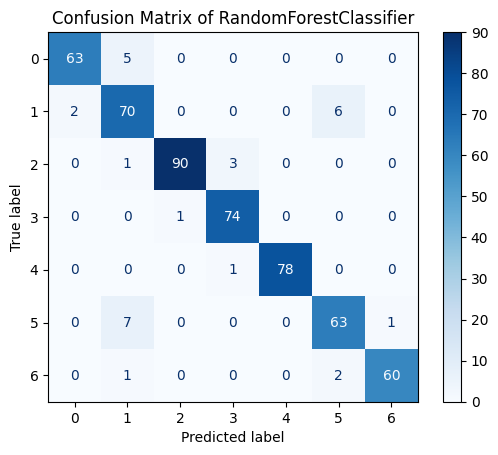

Fitting 5 folds for each of 72 candidates, totalling 360 fits


<Figure size 800x600 with 0 Axes>

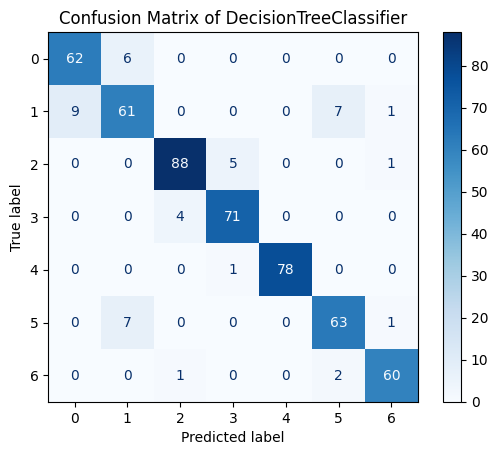

In [73]:
scores = []
classifiers = []
for clf_name, clf_details in params.items():
    model_h = clf_details['model']
    param_grid = clf_details['param']

    grid_search = GridSearchCV(estimator=model_h, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    best_parameter = grid_search.best_params_
    best_model = grid_search.best_estimator_

    pred = best_model.predict(X_test)
    score = accuracy_score(y_test, pred)
    scores.append((clf_name, score, best_parameter))

    classifiers.append(best_model)

    class_labels = np.unique(y_test)
    matrix = confusion_matrix(y_test, pred)

    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix of {clf_name}')
    plt.show()

In [74]:
final = pd.DataFrame(scores, columns=['Model', 'Score', 'Best Parameter'])
final = final.sort_values('Score', ascending=False)
final

,Model,Score,Best Parameter
1,SVC,0.960227,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}"
2,RandomForestClassifier,0.943182,"{'criterion': 'entropy', 'max_depth': None, 'm..."
3,DecisionTreeClassifier,0.914773,"{'criterion': 'entropy', 'max_depth': None, 'm..."
0,LogisticRegression,0.818182,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"


In [75]:
final['Best Parameter'].iloc[0]

{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}

SO WE HAVE HAVE FIND THE BEST MODEL CLASSIFICATION USING HYPER PARAMETER TUNING.. WHICH WE FOUND AS 'SVC' AND ITS PARAMETER